## Dolphin social network
#### This is an undirected social network of frequent associations between 62 dolphins in a community living off Doubtful Sound, New Zealand, as compiled by Lusseau et al. (2003).  The data was collected from Nov. 1994 to Nov. 2001 and the survey route has remained constant over the 7-year period and covered the entire home range of the Doubtful Sound population.
#### The data was collected from Nov. 1994 to Nov. 2001 by a consistent survey route over 7-year period which covers the entire habitat in Doubtful Sound for bottlenose dolphins. As complied by Lusseau et. al. (2003), 62 nodes in this network correspond to 62 dolphins and were distinguished by their “name” while edges were placed between dolphins if they followed the same direction and were cohesive in their movement. We also have the sex information as metadata for 38 dolphins among all while the other 24 dolphins were recorded as “unknown”.
#### Additional information on the network can be found in D. Lusseau, The emergent properties of a dolphin social network, Proc. R. Soc. London B (suppl.) 270, S186-S188 (2003). D. Lusseau, Evidence for social role in a dolphin social network, Preprint q-bio/0607048 (http://arxiv.org/abs/q-bio.PE/0607048)
#### Please cite D. Lusseau, K. Schneider, O. J. Boisseau, P. Haase, E. Slooten, and S. M. Dawson, The bottlenose dolphin community of Doubtful Sound features a large proportion of long-lasting associations, Behavioral Ecology and Sociobiology 54, 396-405 (2003).

In [12]:
import community
import networkx as nx
import matplotlib.pyplot as plt

# read dolphin network data in gml format labeled by name
dol = nx.read_gml("/Users/kate/dolphins/dolphins.gml",label = 'id' )


In [13]:
dol.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61))

In [14]:
list(dol.edges())

[(0, 10),
 (0, 14),
 (0, 15),
 (0, 40),
 (0, 42),
 (0, 47),
 (1, 17),
 (1, 19),
 (1, 26),
 (1, 27),
 (1, 28),
 (1, 36),
 (1, 41),
 (1, 54),
 (2, 10),
 (2, 42),
 (2, 44),
 (2, 61),
 (3, 8),
 (3, 14),
 (3, 59),
 (4, 51),
 (5, 9),
 (5, 13),
 (5, 56),
 (5, 57),
 (6, 9),
 (6, 13),
 (6, 17),
 (6, 54),
 (6, 56),
 (6, 57),
 (7, 19),
 (7, 27),
 (7, 30),
 (7, 40),
 (7, 54),
 (8, 20),
 (8, 28),
 (8, 37),
 (8, 45),
 (8, 59),
 (9, 13),
 (9, 17),
 (9, 32),
 (9, 41),
 (9, 57),
 (10, 29),
 (10, 42),
 (10, 47),
 (11, 51),
 (12, 33),
 (13, 17),
 (13, 32),
 (13, 41),
 (13, 54),
 (13, 57),
 (14, 16),
 (14, 24),
 (14, 33),
 (14, 34),
 (14, 37),
 (14, 38),
 (14, 40),
 (14, 43),
 (14, 50),
 (14, 52),
 (15, 18),
 (15, 24),
 (15, 40),
 (15, 45),
 (15, 55),
 (15, 59),
 (16, 20),
 (16, 33),
 (16, 37),
 (16, 38),
 (16, 50),
 (17, 22),
 (17, 25),
 (17, 27),
 (17, 31),
 (17, 57),
 (18, 20),
 (18, 21),
 (18, 24),
 (18, 29),
 (18, 45),
 (18, 51),
 (19, 30),
 (19, 54),
 (20, 28),
 (20, 36),
 (20, 38),
 (20, 44),
 (20,

In [15]:
dol.nodes[0]

{'label': 'Beak'}

In [16]:
#read the network again and labeled by name, this contains
#gender characteirstic of 39 dolphins among 62

dol2 = nx.read_gml("/Users/kate/dolphins/dolphins_sex.gml", label='id' )

In [17]:
dol2.nodes[0]

{'label': 'Beak', 'sex': 'male'}

## 1. Apply Louvain method

/Users/kate/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


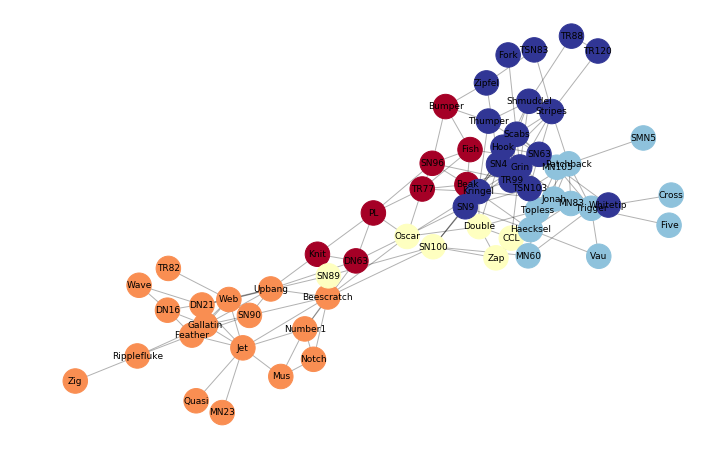

In [18]:
import timeit
start_time = timeit.default_timer()

node_dict = dol.node 
newlabels = dict((x,node_dict[x]['label']) for x in dol.nodes())

partition = community.best_partition(dol)

elapsed = timeit.default_timer() - start_time

pos = nx.spring_layout(dol)
plt.figure(figsize=(12, 8))
plt.axis('off')
nx.draw_networkx_nodes(dol, pos, node_size=600, cmap=plt.cm.RdYlBu, node_color=list(partition.values()))
nx.draw_networkx_edges(dol, pos, alpha=0.3)
nx.draw_networkx_labels(dol,pos,newlabels,font_size=9,font_color='black')
#plt.savefig("D-DolphinLouvain.png", format="PNG")
plt.show(dol)

In [19]:
elapsed

0.06789863400013019

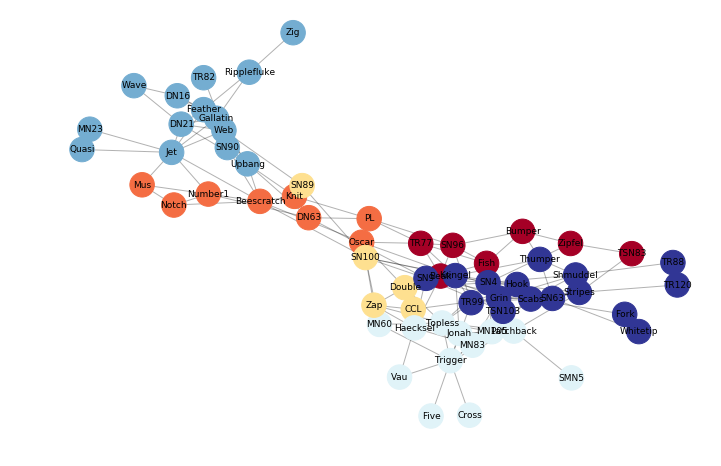

In [20]:
start_time2 = timeit.default_timer()

partition2 = community.best_partition(dol)

elapsed2 = timeit.default_timer() - start_time2

pos = nx.spring_layout(dol)
plt.figure(figsize=(12, 8))
plt.axis('off')
nx.draw_networkx_nodes(dol, pos, node_size=600, cmap=plt.cm.RdYlBu, node_color=list(partition2.values()))
nx.draw_networkx_edges(dol, pos, alpha=0.3)
nx.draw_networkx_labels(dol,pos,newlabels,font_size=9,font_color='black')
#plt.savefig("D-DolphinLouvain2.png", format="PNG")
plt.show(dol)

In [21]:
elapsed2

0.055061382999838315

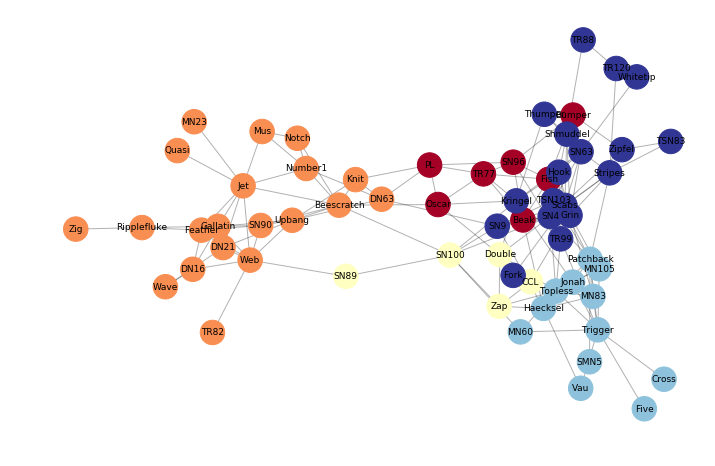

In [22]:
start_time3 = timeit.default_timer()

partition3 = community.best_partition(dol)

elapsed3 = timeit.default_timer() - start_time3

pos = nx.spring_layout(dol)
plt.figure(figsize=(12, 8))
plt.axis('off')
nx.draw_networkx_nodes(dol, pos, node_size=600, cmap=plt.cm.RdYlBu, node_color=list(partition3.values()))
nx.draw_networkx_edges(dol, pos, alpha=0.3)
nx.draw_networkx_labels(dol,pos,newlabels,font_size=9,font_color='black')
#plt.savefig("D-DolphinLouvain2.png", format="PNG")
plt.show(dol)

In [23]:
elapsed3

0.13549405599997044

#### We applied Louvain method several times and got different community structures illustrating that there might exist different partitions with same large modularity value, which increases the uncertainty of the network analysis.

In [24]:
#calculate the variation of information
import numpy as np
from pyitlib import discrete_random_variable as drv

In [50]:
#list(partition3.values())

In [25]:
p2=list(partition2.values())
p3=list(partition3.values())
p1=list(partition.values())

In [68]:
print("VI between partition1 and partition2:", drv.information_variation(p1, p2, cartesian_product=False, base=2, fill_value=-1, estimator='ML', Alphabet_X=None, Alphabet_Y=None, keep_dims=False))
print("VI between partition1 and partition3:", drv.information_variation(p1, p3, cartesian_product=False, base=2, fill_value=-1, estimator='ML', Alphabet_X=None, Alphabet_Y=None, keep_dims=False))

VI between partition1 and partition2: 0.8328531318420906
VI between partition1 and partition3: 0.45920859229291766


### run louvain method 20 times and calculate VI between each pairs of resulted partition

In [259]:
for i in range(20):    
    partition = community.best_partition(dol)
    print(i, "th result:",list(partition.values()))

0 th result: [0, 1, 0, 2, 3, 4, 4, 1, 2, 4, 0, 3, 5, 4, 5, 3, 5, 4, 3, 1, 5, 3, 4, 3, 3, 1, 1, 1, 1, 3, 1, 4, 4, 5, 5, 3, 2, 5, 5, 2, 5, 4, 0, 5, 5, 3, 5, 0, 4, 5, 5, 3, 5, 0, 4, 3, 4, 4, 5, 2, 4, 0]
1 th result: [0, 1, 0, 2, 3, 1, 1, 1, 2, 1, 0, 3, 4, 1, 4, 3, 4, 1, 3, 1, 4, 3, 1, 3, 3, 1, 1, 1, 2, 3, 1, 1, 1, 4, 4, 3, 2, 4, 4, 2, 4, 1, 0, 4, 4, 3, 4, 0, 1, 4, 4, 3, 4, 0, 1, 3, 1, 1, 4, 2, 1, 0]
2 th result: [0, 1, 0, 2, 2, 3, 3, 1, 2, 3, 0, 2, 4, 3, 4, 2, 4, 3, 2, 1, 4, 2, 3, 2, 2, 1, 1, 1, 1, 2, 1, 3, 3, 4, 4, 2, 4, 4, 4, 3, 4, 3, 0, 4, 4, 2, 4, 0, 3, 4, 4, 2, 4, 0, 3, 2, 3, 3, 4, 2, 3, 0]
3 th result: [0, 1, 0, 2, 3, 1, 1, 1, 2, 1, 0, 3, 4, 1, 4, 3, 4, 1, 3, 1, 4, 3, 1, 3, 3, 1, 1, 1, 0, 3, 0, 1, 1, 4, 4, 3, 2, 4, 4, 2, 4, 1, 0, 4, 4, 3, 4, 0, 1, 4, 4, 3, 4, 4, 1, 3, 1, 1, 4, 2, 1, 4]
4 th result: [0, 1, 0, 2, 3, 4, 4, 1, 2, 4, 0, 3, 5, 4, 5, 3, 5, 4, 3, 1, 5, 3, 4, 3, 3, 1, 1, 1, 1, 3, 1, 4, 4, 5, 5, 3, 2, 5, 5, 2, 5, 4, 0, 5, 5, 3, 5, 0, 4, 5, 5, 3, 5, 0, 4, 3, 4, 4, 5, 2, 4, 0]


In [8]:
p4=[0, 1, 0, 2, 3, 1, 1, 0, 2, 1, 0, 3, 4, 1, 4, 3, 4, 1, 3, 0, 4, 3, 1, 3, 3, 1, 1, 1, 2, 3, 0, 1, 1, 4, 4, 3, 2, 4, 4, 2, 4, 1, 0, 4, 4, 3, 4, 0, 1, 4, 4, 3, 4, 4, 1, 3, 1, 1, 4, 2, 1, 4]
p5=[0, 1, 0, 2, 2, 1, 1, 0, 2, 1, 0, 2, 3, 1, 3, 2, 3, 1, 2, 0, 3, 2, 1, 2, 2, 1, 1, 1, 0, 2, 0, 1, 1, 3, 3, 2, 3, 3, 3, 3, 3, 1, 0, 3, 3, 2, 3, 0, 1, 3, 3, 2, 3, 3, 1, 2, 1, 1, 3, 2, 1, 3]
p6=[0, 1, 0, 2, 3, 1, 1, 0, 2, 1, 0, 3, 4, 1, 4, 3, 4, 1, 3, 0, 2, 3, 1, 3, 3, 1, 1, 1, 2, 3, 0, 1, 1, 4, 4, 3, 2, 4, 4, 2, 4, 1, 0, 4, 4, 3, 4, 0, 1, 4, 4, 3, 4, 4, 1, 3, 1, 1, 4, 2, 1, 4]
p7=[0, 1, 0, 2, 3, 1, 1, 0, 2, 1, 0, 3, 4, 1, 4, 3, 4, 1, 3, 0, 2, 3, 1, 3, 3, 1, 1, 1, 2, 3, 0, 1, 1, 4, 4, 3, 2, 4, 4, 2, 4, 1, 0, 4, 4, 3, 4, 0, 1, 4, 4, 3, 4, 4, 1, 3, 1, 1, 4, 2, 1, 4]
p8=[0, 1, 0, 2, 3, 1, 1, 1, 2, 1, 0, 3, 4, 1, 4, 3, 4, 1, 3, 1, 0, 3, 1, 3, 3, 1, 1, 1, 0, 3, 0, 1, 1, 4, 4, 3, 2, 4, 4, 2, 4, 1, 0, 4, 0, 3, 4, 0, 1, 4, 4, 3, 4, 4, 1, 3, 1, 1, 4, 2, 1, 4]
p9=[0, 1, 0, 2, 3, 1, 1, 0, 2, 1, 0, 3, 4, 1, 4, 3, 4, 1, 3, 0, 4, 3, 1, 3, 3, 1, 1, 1, 2, 3, 0, 1, 1, 4, 4, 3, 2, 4, 4, 2, 4, 1, 0, 4, 4, 3, 4, 0, 1, 4, 4, 3, 4, 4, 1, 3, 1, 1, 4, 2, 1, 4]
p10=[0, 1, 0, 2, 3, 1, 1, 0, 2, 1, 0, 3, 4, 1, 4, 3, 4, 1, 3, 0, 2, 3, 1, 3, 3, 1, 1, 1, 2, 3, 0, 1, 1, 4, 4, 3, 2, 4, 4, 2, 4, 1, 0, 4, 4, 3, 4, 0, 1, 4, 4, 3, 4, 4, 1, 3, 1, 1, 4, 2, 1, 4]
p11=[0, 1, 0, 2, 3, 1, 1, 1, 2, 1, 0, 3, 4, 1, 4, 3, 4, 1, 3, 1, 4, 3, 1, 3, 3, 1, 1, 1, 0, 3, 0, 1, 1, 4, 4, 3, 2, 4, 4, 2, 4, 1, 0, 4, 4, 3, 4, 0, 1, 4, 4, 3, 4, 4, 1, 3, 1, 1, 4, 2, 1, 4]
p12=[0, 1, 0, 2, 3, 1, 1, 0, 2, 1, 0, 3, 4, 1, 4, 3, 4, 1, 3, 0, 4, 3, 1, 3, 3, 1, 1, 1, 2, 3, 0, 1, 1, 4, 4, 3, 2, 4, 4, 2, 4, 1, 0, 4, 4, 3, 4, 0, 1, 4, 4, 3, 4, 4, 1, 3, 1, 1, 4, 2, 1, 4]
p13=[0, 1, 0, 2, 3, 4, 4, 1, 2, 4, 0, 3, 5, 4, 5, 3, 5, 4, 3, 1, 5, 3, 4, 3, 3, 1, 1, 1, 1, 3, 1, 4, 4, 5, 5, 3, 2, 5, 5, 2, 5, 4, 0, 5, 5, 3, 5, 0, 4, 5, 5, 3, 5, 0, 4, 3, 4, 4, 5, 2, 4, 0]

In [70]:
print("VI between partition1 and partition2:", drv.information_variation(p1, p2, cartesian_product=False, base=2, fill_value=-1, estimator='ML', Alphabet_X=None, Alphabet_Y=None, keep_dims=False))
print("VI between partition1 and partition3:", drv.information_variation(p1, p3, cartesian_product=False, base=2, fill_value=-1, estimator='ML', Alphabet_X=None, Alphabet_Y=None, keep_dims=False))
print("VI between partition1 and partition4:", drv.information_variation(p1, p4, cartesian_product=False, base=2, fill_value=-1, estimator='ML', Alphabet_X=None, Alphabet_Y=None, keep_dims=False))
print("VI between partition1 and partition5:", drv.information_variation(p1, p5, cartesian_product=False, base=2, fill_value=-1, estimator='ML', Alphabet_X=None, Alphabet_Y=None, keep_dims=False))
print("VI between partition1 and partition6:", drv.information_variation(p1, p6, cartesian_product=False, base=2, fill_value=-1, estimator='ML', Alphabet_X=None, Alphabet_Y=None, keep_dims=False))
print("VI between partition1 and partition7:", drv.information_variation(p1, p7, cartesian_product=False, base=2, fill_value=-1, estimator='ML', Alphabet_X=None, Alphabet_Y=None, keep_dims=False))
print("VI between partition1 and partition8:", drv.information_variation(p1, p8, cartesian_product=False, base=2, fill_value=-1, estimator='ML', Alphabet_X=None, Alphabet_Y=None, keep_dims=False))
print("VI between partition1 and partition9:", drv.information_variation(p1, p9, cartesian_product=False, base=2, fill_value=-1, estimator='ML', Alphabet_X=None, Alphabet_Y=None, keep_dims=False))
print("VI between partition1 and partition10:", drv.information_variation(p1, p10, cartesian_product=False, base=2, fill_value=-1, estimator='ML', Alphabet_X=None, Alphabet_Y=None, keep_dims=False))
print("VI between partition1 and partition11:", drv.information_variation(p1, p11, cartesian_product=False, base=2, fill_value=-1, estimator='ML', Alphabet_X=None, Alphabet_Y=None, keep_dims=False))
print("VI between partition1 and partition12:", drv.information_variation(p1, p12, cartesian_product=False, base=2, fill_value=-1, estimator='ML', Alphabet_X=None, Alphabet_Y=None, keep_dims=False))
print("VI between partition1 and partition13:", drv.information_variation(p1, p13, cartesian_product=False, base=2, fill_value=-1, estimator='ML', Alphabet_X=None, Alphabet_Y=None, keep_dims=False))


VI between partition1 and partition2: 0.8328531318420906
VI between partition1 and partition3: 0.45920859229291766
VI between partition1 and partition4: 0.8328531318420906
VI between partition1 and partition5: 1.1425717085322036
VI between partition1 and partition6: 0.9838726456665232
VI between partition1 and partition7: 0.9838726456665232
VI between partition1 and partition8: 0.975348930341684
VI between partition1 and partition9: 0.8328531318420906
VI between partition1 and partition10: 0.9838726456665232
VI between partition1 and partition11: 0.729973886551313
VI between partition1 and partition12: 0.8328531318420906
VI between partition1 and partition13: 0.0


In [79]:
print("VI between partition6 and partition7:", drv.information_variation(p6, p7, cartesian_product=False, base=2, fill_value=-1, estimator='ML', Alphabet_X=None, Alphabet_Y=None, keep_dims=False))
print("VI between partition6 and partition10:", drv.information_variation(p6, p10, cartesian_product=False, base=2, fill_value=-1, estimator='ML', Alphabet_X=None, Alphabet_Y=None, keep_dims=False))
print("VI between partition2 and partition4:", drv.information_variation(p2, p4, cartesian_product=False, base=2, fill_value=-1, estimator='ML', Alphabet_X=None, Alphabet_Y=None, keep_dims=False))
print("VI between partition2 and partition9:", drv.information_variation(p2, p9, cartesian_product=False, base=2, fill_value=-1, estimator='ML', Alphabet_X=None, Alphabet_Y=None, keep_dims=False))
print("VI between partition2 and partition12:", drv.information_variation(p2, p12, cartesian_product=False, base=2, fill_value=-1, estimator='ML', Alphabet_X=None, Alphabet_Y=None, keep_dims=False))


VI between partition6 and partition7: 0.0
VI between partition6 and partition10: 0.0
VI between partition2 and partition4: 0.0
VI between partition2 and partition9: 0.0
VI between partition2 and partition12: 0.0


#### It can be seen that partition 1 and 13 are same, i.e., p1=p13.  p6=p7=p10 and p2=p4=p9=p12. Then the Louvain method yields 7 different partitions with similar large modularity, which we denote them from par1 to par7.

In [72]:
print("VI between partition2 and partition3:", drv.information_variation(p2, p3, cartesian_product=False, base=2, fill_value=-1, estimator='ML', Alphabet_X=None, Alphabet_Y=None, keep_dims=False))
print("VI between partition2 and partition4:", drv.information_variation(p2, p4, cartesian_product=False, base=2, fill_value=-1, estimator='ML', Alphabet_X=None, Alphabet_Y=None, keep_dims=False))
print("VI between partition2 and partition5:", drv.information_variation(p2, p5, cartesian_product=False, base=2, fill_value=-1, estimator='ML', Alphabet_X=None, Alphabet_Y=None, keep_dims=False))
print("VI between partition2 and partition6:", drv.information_variation(p2, p6, cartesian_product=False, base=2, fill_value=-1, estimator='ML', Alphabet_X=None, Alphabet_Y=None, keep_dims=False))
print("VI between partition2 and partition7:", drv.information_variation(p2, p7, cartesian_product=False, base=2, fill_value=-1, estimator='ML', Alphabet_X=None, Alphabet_Y=None, keep_dims=False))
print("VI between partition2 and partition8:", drv.information_variation(p2, p8, cartesian_product=False, base=2, fill_value=-1, estimator='ML', Alphabet_X=None, Alphabet_Y=None, keep_dims=False))
print("VI between partition2 and partition9:", drv.information_variation(p2, p9, cartesian_product=False, base=2, fill_value=-1, estimator='ML', Alphabet_X=None, Alphabet_Y=None, keep_dims=False))
print("VI between partition2 and partition10:", drv.information_variation(p2, p10, cartesian_product=False, base=2, fill_value=-1, estimator='ML', Alphabet_X=None, Alphabet_Y=None, keep_dims=False))
print("VI between partition2 and partition11:", drv.information_variation(p2, p11, cartesian_product=False, base=2, fill_value=-1, estimator='ML', Alphabet_X=None, Alphabet_Y=None, keep_dims=False))
print("VI between partition2 and partition12:", drv.information_variation(p2, p12, cartesian_product=False, base=2, fill_value=-1, estimator='ML', Alphabet_X=None, Alphabet_Y=None, keep_dims=False))


VI between partition2 and partition3: 1.2920617241350074
VI between partition2 and partition4: 0.0
VI between partition2 and partition5: 0.5402104162941985
VI between partition2 and partition6: 0.1566692124964857
VI between partition2 and partition7: 0.1566692124964857
VI between partition2 and partition8: 0.6427172811607149
VI between partition2 and partition9: 0.0
VI between partition2 and partition10: 0.1566692124964857
VI between partition2 and partition11: 0.38567711044234
VI between partition2 and partition12: 0.0


In [26]:
par1=p1
par2=p2
par3=p3
par4=p5
par5=p6
par6=p8
par7=p11

In [77]:
print("VI between partition3 and partition5:", drv.information_variation(p3, p5, cartesian_product=False, base=2, fill_value=-1, estimator='ML', Alphabet_X=None, Alphabet_Y=None, keep_dims=False))
print("VI between partition3 and partition6:", drv.information_variation(p3, p6, cartesian_product=False, base=2, fill_value=-1, estimator='ML', Alphabet_X=None, Alphabet_Y=None, keep_dims=False))
print("VI between partition3 and partition7:", drv.information_variation(p3, p7, cartesian_product=False, base=2, fill_value=-1, estimator='ML', Alphabet_X=None, Alphabet_Y=None, keep_dims=False))
print("VI between partition3 and partition8:", drv.information_variation(p3, p8, cartesian_product=False, base=2, fill_value=-1, estimator='ML', Alphabet_X=None, Alphabet_Y=None, keep_dims=False))
print("VI between partition3 and partition10:", drv.information_variation(p3, p10, cartesian_product=False, base=2, fill_value=-1, estimator='ML', Alphabet_X=None, Alphabet_Y=None, keep_dims=False))
print("VI between partition3 and partition11:", drv.information_variation(p3, p11, cartesian_product=False, base=2, fill_value=-1, estimator='ML', Alphabet_X=None, Alphabet_Y=None, keep_dims=False))


VI between partition3 and partition5: 0.9188595686690058
VI between partition3 and partition6: 1.3785651089271824
VI between partition3 and partition7: 1.3785651089271824
VI between partition3 and partition8: 1.4345575226346017
VI between partition3 and partition10: 1.3785651089271824
VI between partition3 and partition11: 1.1891824788442298


In [84]:
print("VI between par1 and par2:", drv.information_variation(par1, par2, cartesian_product=False, base=2, fill_value=-1, estimator='ML', Alphabet_X=None, Alphabet_Y=None, keep_dims=False))
print("VI between par1 and par3:", drv.information_variation(par1, par3, cartesian_product=False, base=2, fill_value=-1, estimator='ML', Alphabet_X=None, Alphabet_Y=None, keep_dims=False))
print("VI between par1 and par4:", drv.information_variation(par1, par4, cartesian_product=False, base=2, fill_value=-1, estimator='ML', Alphabet_X=None, Alphabet_Y=None, keep_dims=False))
print("VI between par1 and par5:", drv.information_variation(par1, par5, cartesian_product=False, base=2, fill_value=-1, estimator='ML', Alphabet_X=None, Alphabet_Y=None, keep_dims=False))
print("VI between par1 and par6:", drv.information_variation(par1, par6, cartesian_product=False, base=2, fill_value=-1, estimator='ML', Alphabet_X=None, Alphabet_Y=None, keep_dims=False))
print("VI between par1 and par7:", drv.information_variation(par1, par7, cartesian_product=False, base=2, fill_value=-1, estimator='ML', Alphabet_X=None, Alphabet_Y=None, keep_dims=False))


VI between par1 and par2: 0.8328531318420906
VI between par1 and par3: 0.45920859229291766
VI between par1 and par4: 1.1425717085322036
VI between par1 and par5: 0.9838726456665232
VI between par1 and par6: 0.975348930341684
VI between par1 and par7: 0.729973886551313


In [85]:
print("VI between par2 and par3:", drv.information_variation(par2, par3, cartesian_product=False, base=2, fill_value=-1, estimator='ML', Alphabet_X=None, Alphabet_Y=None, keep_dims=False))
print("VI between par2 and par4:", drv.information_variation(par2, par4, cartesian_product=False, base=2, fill_value=-1, estimator='ML', Alphabet_X=None, Alphabet_Y=None, keep_dims=False))
print("VI between par2 and par5:", drv.information_variation(par2, par5, cartesian_product=False, base=2, fill_value=-1, estimator='ML', Alphabet_X=None, Alphabet_Y=None, keep_dims=False))
print("VI between par2 and par6:", drv.information_variation(par2, par6, cartesian_product=False, base=2, fill_value=-1, estimator='ML', Alphabet_X=None, Alphabet_Y=None, keep_dims=False))
print("VI between par2 and par7:", drv.information_variation(par2, par7, cartesian_product=False, base=2, fill_value=-1, estimator='ML', Alphabet_X=None, Alphabet_Y=None, keep_dims=False))


VI between par2 and par3: 1.2920617241350074
VI between par2 and par4: 0.5402104162941985
VI between par2 and par5: 0.1566692124964857
VI between par2 and par6: 0.6427172811607149
VI between par2 and par7: 0.38567711044234


In [86]:
print("VI between par3 and par4:", drv.information_variation(par3, par4, cartesian_product=False, base=2, fill_value=-1, estimator='ML', Alphabet_X=None, Alphabet_Y=None, keep_dims=False))
print("VI between par3 and par5:", drv.information_variation(par3, par5, cartesian_product=False, base=2, fill_value=-1, estimator='ML', Alphabet_X=None, Alphabet_Y=None, keep_dims=False))
print("VI between par3 and par6:", drv.information_variation(par3, par6, cartesian_product=False, base=2, fill_value=-1, estimator='ML', Alphabet_X=None, Alphabet_Y=None, keep_dims=False))
print("VI between par3 and par7:", drv.information_variation(par3, par7, cartesian_product=False, base=2, fill_value=-1, estimator='ML', Alphabet_X=None, Alphabet_Y=None, keep_dims=False))


VI between par3 and par4: 0.9188595686690058
VI between par3 and par5: 1.3785651089271824
VI between par3 and par6: 1.4345575226346017
VI between par3 and par7: 1.1891824788442298


In [87]:
print("VI between par4 and par5:", drv.information_variation(par4, par5, cartesian_product=False, base=2, fill_value=-1, estimator='ML', Alphabet_X=None, Alphabet_Y=None, keep_dims=False))
print("VI between par4 and par6:", drv.information_variation(par4, par6, cartesian_product=False, base=2, fill_value=-1, estimator='ML', Alphabet_X=None, Alphabet_Y=None, keep_dims=False))
print("VI between par4 and par7:", drv.information_variation(par4, par7, cartesian_product=False, base=2, fill_value=-1, estimator='ML', Alphabet_X=None, Alphabet_Y=None, keep_dims=False))


VI between par4 and par5: 0.6080122900112179
VI between par4 and par6: 0.9235133755205138
VI between par4 and par7: 0.6664732048021389


In [89]:
print("VI between par5 and par6:", drv.information_variation(par5, par6, cartesian_product=False, base=2, fill_value=-1, estimator='ML', Alphabet_X=None, Alphabet_Y=None, keep_dims=False))
print("VI between par5 and par7:", drv.information_variation(par5, par7, cartesian_product=False, base=2, fill_value=-1, estimator='ML', Alphabet_X=None, Alphabet_Y=None, keep_dims=False))
print("VI between par6 and par7:", drv.information_variation(par6, par7, cartesian_product=False, base=2, fill_value=-1, estimator='ML', Alphabet_X=None, Alphabet_Y=None, keep_dims=False))


VI between par5 and par6: 0.619651599311851
VI between par5 and par7: 0.5423463229388266
VI between par6 and par7: 0.25704017071837404


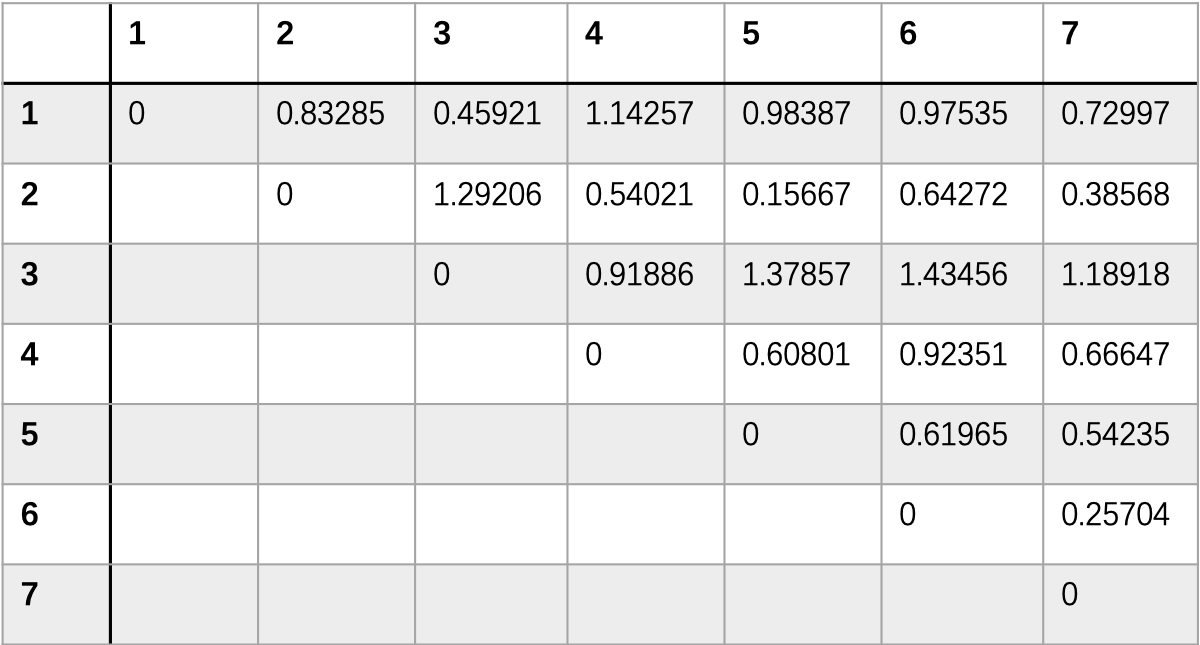

#### From the VI value table we can see that par7 can be regarded as a reasonable partition since it has a relatively small VI with other partitions.
#### Visualization of the Dolphin social network, nodes are colored according to the detected communities by Louvain and node size are related to the node betweenness centrality while the name and gender of dolphins are printed on the nodes respectively.

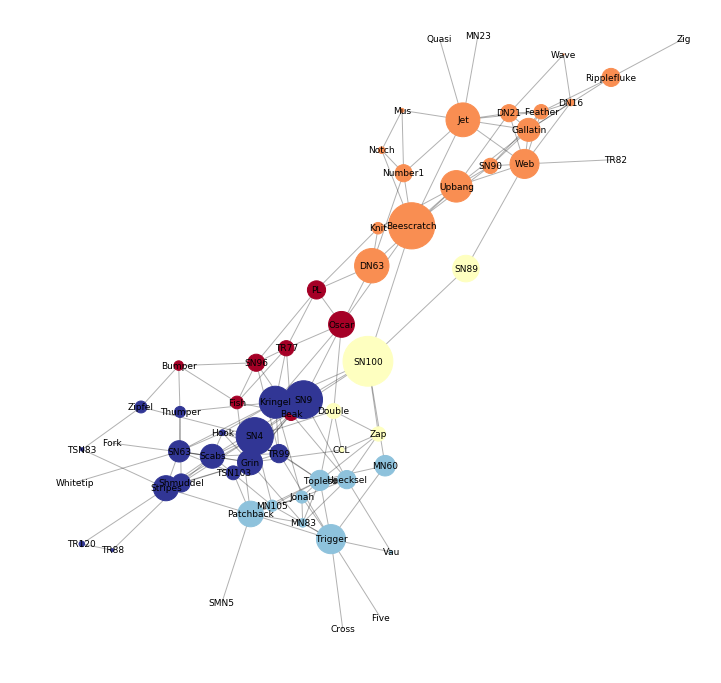

In [291]:
plt.figure(figsize=(12, 12))
plt.axis('off')
d = dict(dol.degree)

B1 = nx.betweenness_centrality(dol) 
nx.draw_networkx_nodes(dol, pos, node_size=[v * 10000 for v in B1.values()], cmap=plt.cm.RdYlBu, node_color=par7)
nx.draw_networkx_edges(dol, pos, alpha=0.3)
nx.draw_networkx_labels(dol,pos,newlabels,font_size=9,font_color='black')
#plt.savefig("D-Dolphin-reasonable-Louvain-nodesize3.png", format="PNG")
plt.show(dol)

In [138]:
#create sex labels of dolphin
node_dict2 = dol2.node 
sexlabels = dict((x,node_dict2[x]['sex']) for x in dol2.nodes())


In [166]:
#sexlabels 

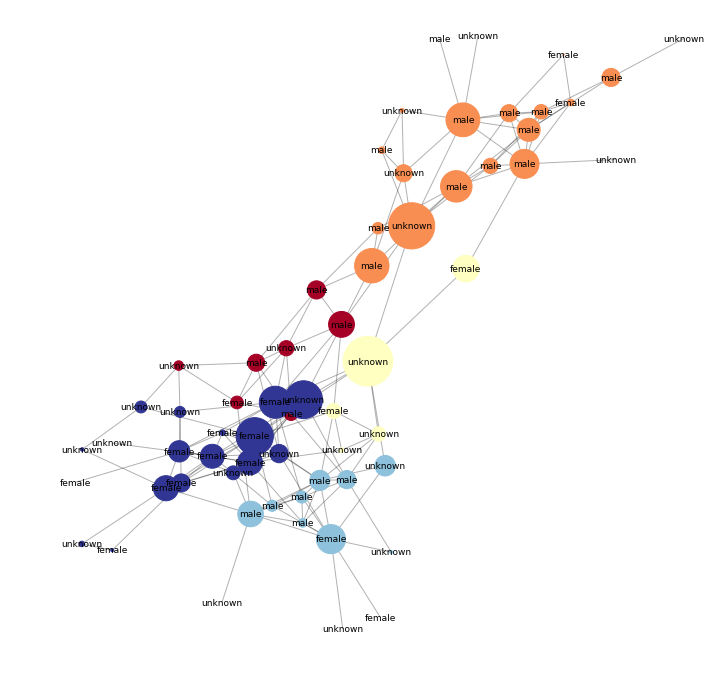

In [286]:
#Visualize Dolphin social network detected by Louvain, nodes are 
#colored according to the detected communities and  labeled by sex

plt.figure(figsize=(12, 12))
plt.axis('off')
d2 = dict(dol2.degree)


nx.draw_networkx_nodes(dol2, pos, node_size=[v * 10000 for v in B.values()], cmap=plt.cm.RdYlBu, node_color=par7)
nx.draw_networkx_edges(dol2, pos, alpha=0.3)
nx.draw_networkx_labels(dol2,pos,sexlabels,font_size=9,font_color='black')
#plt.savefig("D-Dolphin-reasonable-Louvain-sex-nodesizebc.png", format="PNG")
plt.show(dol2)

#### For comparesion, we put them together as follows:
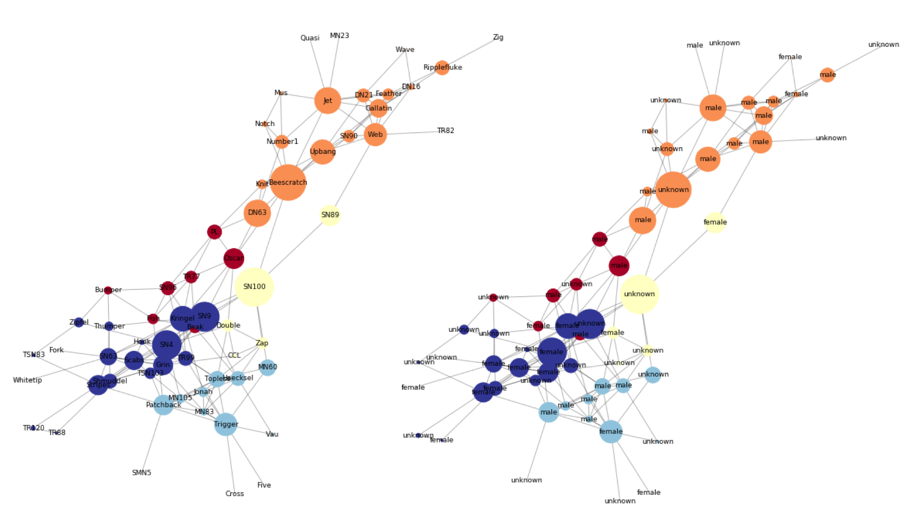
#### Louvain method divided 62 dolphins into 5 communities with varied size and gender composition. The largest alliance colored with orange contains 20 dolphins with mixed-gender, the second largest one colored with dark blue contains 18 dolphins and 10 of them are female while the other 8 was not identified their gender. The third largest community colored with light blue contains 12 dolphins with mixed-sex and the smallest community contains only 5 dolphins with two of them are female.
#### According to the node size in above figure , betweenness centrality of a node describes the degree to which nodes stand between each other. Put it differently, the larger the value of betweenness centrality, the more influential the node. Therefore, it can be seen that dolphins named “Beescratch”, “SN100”, “SN9”, “SN4” and “Trigger” are the most dominative individuals among the entire population in Doubtful Sound area.
#### As for the gender characteristic of dolphins in each community, a noticeable disagreement can be caught between the resulted community structure and the natural partition divided by gender. This variance implied two possible reasons as: 
1. The Louvain method performed bad on this network so that the resulted community structure cannot recovery the natural communities grouping by gender. 
2. Bottlenose dolphins in Doubtful Sound form alliances mainly steered by other factors or multifactor rather than gender characteristic itself, i.e. gender information alone has little significant to the composition of communities.

#### Firstly, in order to test the validity of Louvain method on this dolphins’ network, we fitted an applicable nested degree-corrected SBM to uncover communities.

## 2. Stochastic Block Model fit to infer communities
### Stochastic block model (SBM) is a generative model, the reverse of the generation process, i.e. the fitting of SBM, is the main concern of this project, through which one can incorporate node metadata into community detection problem.¶

In [ ]:
#import packages and read network data
import graph_tool.all as gt
from graph_tool.all import *
from matplotlib import pyplot as plt
import timeit
import numpy as np

g = gt.collection.data["dolphins"]


In [ ]:
#to obtain group information
g.list_properties()   

##only has properties named "label" and "pos", so we need to add their sex information
vlabel = g.vertex_properties["label"]  

In [ ]:
#add sex information to the dataset
##vprop = g.new_vertex_property("string")
##g.vertex_properties["sex"] = vprop#this sets the actual property map

#g.list_properties() 

#now we have a node property position called "sex", 
#then we add "male","female" and "unknown" inside.

In [ ]:
#add sex information to the dataset
vprop = g.new_vertex_property("string")
g.vp.sex=vprop   #this sets the actual property map
v=g.vertex(0)     #set real value
g.vp.sex[v]="male"
#print(g.vp.sex[v])

In [ ]:
v1=g.vertex(1)
g.vp.sex[v1]="unknown"
v2=g.vertex(2)
g.vp.sex[v2]="unknown"
v3=g.vertex(3)
g.vp.sex[v3]="unknown"
v4=g.vertex(4)
g.vp.sex[v4]="unknown"

v5=g.vertex(5)
g.vp.sex[v5]="female"
v6=g.vertex(6)
g.vp.sex[v6]="male"
v7=g.vertex(7)
g.vp.sex[v7]="male"
v8=g.vertex(8)
g.vp.sex[v8]="female"
v9=g.vertex(9)
g.vp.sex[v9]="male"
v10=g.vertex(10)
g.vp.sex[v10]="female"
v11=g.vertex(11)
g.vp.sex[v11]="female"
v12=g.vertex(12)
g.vp.sex[v12]="unknown"
v13=g.vertex(13)
g.vp.sex[v13]="male"
v14=g.vertex(14)
g.vp.sex[v14]="female"
v15=g.vertex(15)
g.vp.sex[v15]="male"
v16=g.vertex(16)
g.vp.sex[v16]="female"
v17=g.vertex(17)
g.vp.sex[v17]="male"
v18=g.vertex(18)
g.vp.sex[v18]="male"

v19=g.vertex(19)
g.vp.sex[v19]="male"
v20=g.vertex(20)
g.vp.sex[v20]="female"
v21=g.vertex(21)
g.vp.sex[v21]="male"
v22=g.vertex(22)
g.vp.sex[v22]="unknown"
v23=g.vertex(23)
g.vp.sex[v23]="unknown"
v24=g.vertex(24)
g.vp.sex[v24]="male"
v25=g.vertex(25)
g.vp.sex[v25]="unknown"
v26=g.vertex(26)
g.vp.sex[v26]="male"

v27=g.vertex(27)
g.vp.sex[v27]="unknown"
v28=g.vertex(28)
g.vp.sex[v28]="male"

v29=g.vertex(29)
g.vp.sex[v29]="male"
v30=g.vertex(30)
g.vp.sex[v30]="male"
v31=g.vertex(31)
g.vp.sex[v31]="male"
v32=g.vertex(32)
g.vp.sex[v32]="male"
v33=g.vertex(33)
g.vp.sex[v33]="female"
v34=g.vertex(34)
g.vp.sex[v34]="female"
v35=g.vertex(35)
g.vp.sex[v35]="unknown"
v36=g.vertex(36)
g.vp.sex[v36]="unknown"
v37=g.vertex(37)
g.vp.sex[v37]="female"
v38=g.vertex(38)
g.vp.sex[v38]="female"
v39=g.vertex(39)
g.vp.sex[v39]="female"
v40=g.vertex(40)
g.vp.sex[v40]="unknown"
v41=g.vertex(41)
g.vp.sex[v41]="male"
v42=g.vertex(42)
g.vp.sex[v42]="male"
v43=g.vertex(43)
g.vp.sex[v43]="female"
v44=g.vertex(44)
g.vp.sex[v44]="unknown"
v45=g.vertex(45)
g.vp.sex[v45]="male"
v46=g.vertex(46)
g.vp.sex[v46]="unknown"

v47=g.vertex(47)
g.vp.sex[v47]="unknown"
v48=g.vertex(48)
g.vp.sex[v48]="unknown"
v49=g.vertex(49)
g.vp.sex[v49]="female"
v50=g.vertex(50)
g.vp.sex[v50]="unknown"
v51=g.vertex(51)
g.vp.sex[v51]="female"

v52=g.vertex(52)
g.vp.sex[v52]="unknown"
v53=g.vertex(53)
g.vp.sex[v53]="unknown"
v54=g.vertex(54)
g.vp.sex[v54]="male"
v55=g.vertex(55)
g.vp.sex[v55]="unknown"
v56=g.vertex(56)
g.vp.sex[v56]="female"
v57=g.vertex(57)
g.vp.sex[v57]="male"
v58=g.vertex(58)
g.vp.sex[v58]="female"
v59=g.vertex(59)
g.vp.sex[v59]="unknown"
v60=g.vertex(60)
g.vp.sex[v60]="unknown"
v61=g.vertex(61)
g.vp.sex[v61]="unknown"

#print(g.vp.sex[v])


In [ ]:
#set the information of this property
#vsex =['male','unknown','unknown','unknown','unknown',
       'female','male','male','female',
       'male','female','female','unknown','male',
       'female','male','female','male','male',
       'male','female','male','unknown','unknown',
       'male','unknown','male','unknown','male',
       'male','male','male','male','female',
       'female','unknown','unknown','female','female',
       'female','unknown','male','male','female',
       'unknown','male','unknown','unknown',
       'unknown','female','unknown','female','unknown',
       'unknown','male','unknown','female',
       'male','female','unknown','unknown','unknown']

#g.vertex_properties["sex"]=vsex

#vvv=g.vertex_properties["sex"]
#print(vvv)
#vsex

In [ ]:
#fit degree-corrected nested sbm reperatively and calculate the entropy

start_time_dc = timeit.default_timer()

state_dc  = gt.minimize_nested_blockmodel_dl(g, deg_corr=True)

elapsed_dc = timeit.default_timer() - start_time_dc

print ("Non-degree-corrected DL:\t",state_ndc.entropy())    ##Non-degree-corrected DL:	 530.3013323619713
print ("Degree-corrected DL:\t",state_dc.entropy())         ##Degree-corrected DL:	 544.7999265871908


In [ ]:
#obtain information of NO. of clusters in each level of nested SBM fitting process
state_dc.print_summary()
#l: 0, N: 62, B: 2
#l: 1, N: 2, B: 1

In [ ]:
#visualization
state_dc.draw(pos=sfdp_layout(g),  vertex_text=vvertex, vertex_font_size =30, output_size=(3000, 3000), output="Dorphin-dc-sex.png")
state_dc.draw(pos=sfdp_layout(g),  vertex_text=vlabel, vertex_font_size =30, output_size=(3000, 3000), output="Dorphin-dc-index.png")


In [ ]:
#to obtain group information    
levels_dc = state_dc.get_levels() 
for v in g.vertices():
    vindex = g.vertex_index[v]
    r = levels_dc[0].get_blocks()[vindex]
    print (r)

In [27]:
arraysbmdc=( 0,1,0,0,0,1,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,1,1,0,0,0,1,1,
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,1,0)


In [28]:
len(arraysbmdc)

62

In [ ]:
#computation time
print("computation time for fitting the degree-corrected SBM:",  elapsed_dc) ##5.01022

In [29]:
# sbm vs louvain & all with sex!!!
gender_partition=(1,0,0,0,0,2,1,1,2,1,2,2,0,1,2,1,2,1,1,1,2,1,0,0,1,0,1,0,1,1,1,1,1,2,2,0,0,2,2,2,0,1,1,2,0,1,0,0,0,2,0,2,0,0,1,0,2,1,2,0,0,0)
len(gender_partition)

print("VI between the SBM fit and gender partition:",drv.information_variation(arraysbmdc, gender_partition,
                                                                                cartesian_product=False, base=2, fill_value=-1, estimator='ML', Alphabet_X=None, Alphabet_Y=None, keep_dims=False))
print("VI between the gender_partition and louvain:",drv.information_variation(gender_partition, par7,
                                                                                cartesian_product=False, base=2, fill_value=-1, estimator='ML', Alphabet_X=None, Alphabet_Y=None, keep_dims=False))

print("VI between the dc SBM fit and louvain:",drv.information_variation(arraysbmdc, par7, 
                                                                              cartesian_product=False, base=2, fill_value=-1, estimator='ML', Alphabet_X=None, Alphabet_Y=None, keep_dims=False))

VI between the SBM fit and gender partition: 2.272169615493013
VI between the gender_partition and louvain: 3.0223812713725926
VI between the dc SBM fit and louvain: 1.2441613998911678


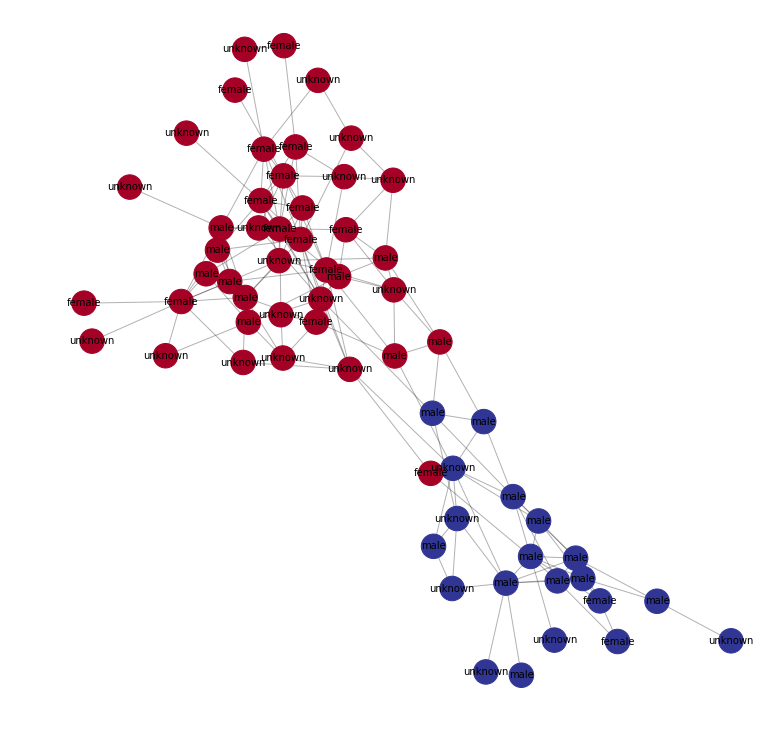

In [305]:
par_sbmdc={0:0,1:1,2:0,3:0,4:0,5:1,6:1,7:1,8:0,9:1,10:0,11:0,12:0,13:1,14:0,15:0,16:0,17:1,18:0,19:1,20:0,
           21:0,22:1,23:0,24:0,25:1,26:1,27:1,28:0,29:0,30:0,31:1,32:1,33:0,34:0,35:0,36:0,37:0,38:0,39:0,
           40:0,41:1,42:0,43:0,44:0,45:0,46:0,47:0,48:1,49:0,50:0,51:0,52:0,53:0,54:1,55:0,56:1,57:1,58:0,
           59:0,60:1,61:0}



pos = nx.spring_layout(dol2)
plt.figure(figsize=(13,13))
plt.axis('off')
nx.draw_networkx_nodes(dol2, pos, node_size=600, cmap=plt.cm.RdYlBu, node_color=list(par_sbmdc.values()))
nx.draw_networkx_edges(dol2, pos, alpha=0.3)
nx.draw_networkx_labels(dol2,pos,sexlabels,font_size=10,font_color='black')
#plt.savefig("D-dolphin-sbmdc-sex.png", format="PNG")
plt.show(dol2)

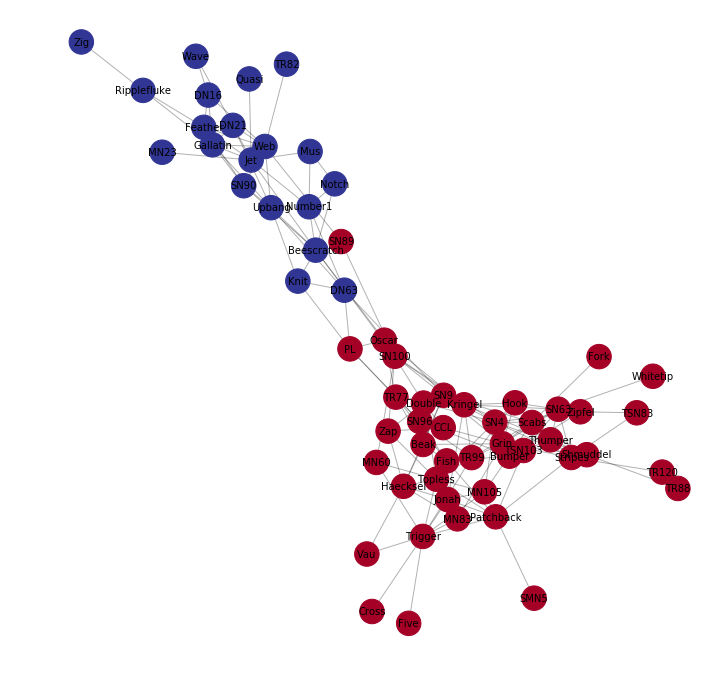

In [302]:
pos = nx.spring_layout(dol)
plt.figure(figsize=(12,12))
plt.axis('off')
nx.draw_networkx_nodes(dol, pos, node_size=600, cmap=plt.cm.RdYlBu, node_color=list(par_sbmdc.values()))
nx.draw_networkx_edges(dol, pos, alpha=0.3)
nx.draw_networkx_labels(dol,pos,newlabels,font_size=10,font_color='black')
#plt.savefig("D-dolphin-sbmdc-name.png", format="PNG")
plt.show(dol)

#### In order to be more intuitive, the visualizations of the nested degree-corrected SBM are post together as follows:
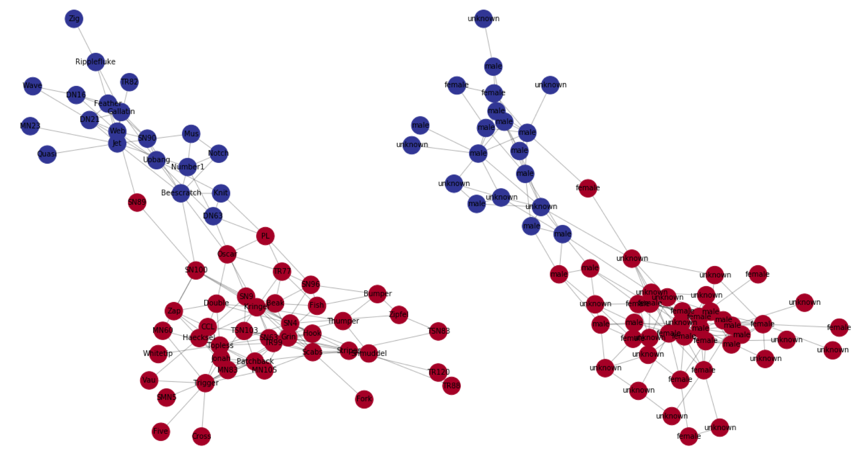
#### Nodes are colored according to the detected communities by the nested degree-corrected SBM fitting process while the name and gender of dolphins are printed on the nodes respectively. Interestingly, there are mere two mixed-sex communities according to this scenario, and one was made up of 20 dolphins while the other comprised 42 dolphins, in stark contrast to five alliances by Louvain.
#### Then, we calculated VI among pairs of partitions resulted from these two community detection schemes as well as the gender partition.

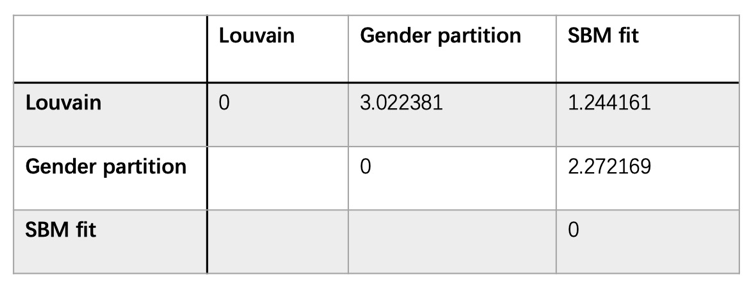

#### Next, we offered a clear table for comparision. However,  the resulted communities by methods described above do not agree with each other and all methods cannot recovery the natural partition related to sex. Thus, we guss there are several different factors dominating the grouping strategies for dolphins in Doubtful Sound and sex is not a crucial factors.
### We still can optimize our SBM model with the help of MCMC algorithm to shed light on the potential community distrubution. That is, we applied MCMC algorithm to generate full model of a network based on the approximation community structure detected as before, and for an attempt to use it make prediction when we have missing data in network dataset or other errors.

### 3. INFEERING COMMUNITIES BY MCMC ALGORITHM（non nested)
### According to previous process, we can involve the MCMC algorithm to set the full generative model

In [ ]:
#starting from an approximation of community structure, here we use the results given by the "best" SBM fit
#g = gt.collection.data["dolphins"]
state= gt.minimize_blockmodel_dl(g) 
state = state.copy(B=g.num_vertices())

#description length of the network measures the amount of information required to describe the data

dS, nattempts, nmoves = state.mcmc_sweep(niter=1000)
print("Change in description length:", dS) ##Change in description length: 0.18933611522808746
print("Number of accepted vertex moves:", nmoves) ##Number of accepted vertex moves: 56968

In [ ]:
#FOR MODEL AVERAGING PROCESS (non nested model)
#We will first equilibrate the Markov chain
gt.mcmc_equilibrate(state, wait=1000, mcmc_args=dict(niter=10))

pv = None

def collect_marginals(s):
    global pv
    b = gt.perfect_prop_hash([s.b])[0]
    pv = s.collect_vertex_marginals(pv, b=b)
gt.mcmc_equilibrate(state, force_niter=10000, mcmc_args=dict(niter=10),callback=collect_marginals)
#Now the node marginals are stored in property map pv. We can visualize them as pie charts on the nodes:

vvertex = g.vertex_properties["sex"]  
state.draw(pos=g.vp.pos, vertex_shape="pie", vertex_pie_fractions=pv
           ,vertex_text=vvertex, vertex_font_size =50, output_size=(3000, 3000)
           ,edge_gradient=None, output="dorphin-sbm-marginals.png")

##this would output a graph，nodes are in pie chart shape，each fraction corresponds to belonging prob.
state.draw(pos=g.vp.pos, vertex_shape="pie", vertex_pie_fractions=pv
           ,vertex_text=vlabel, vertex_font_size =30, output_size=(3000, 3000)
           ,edge_gradient=None, output="dorphin-sbm-namemarginals.png")
####this would output a graph，nodes are in pie chart shape and labeled by their name.
###each fraction corresponds to belonging prob.


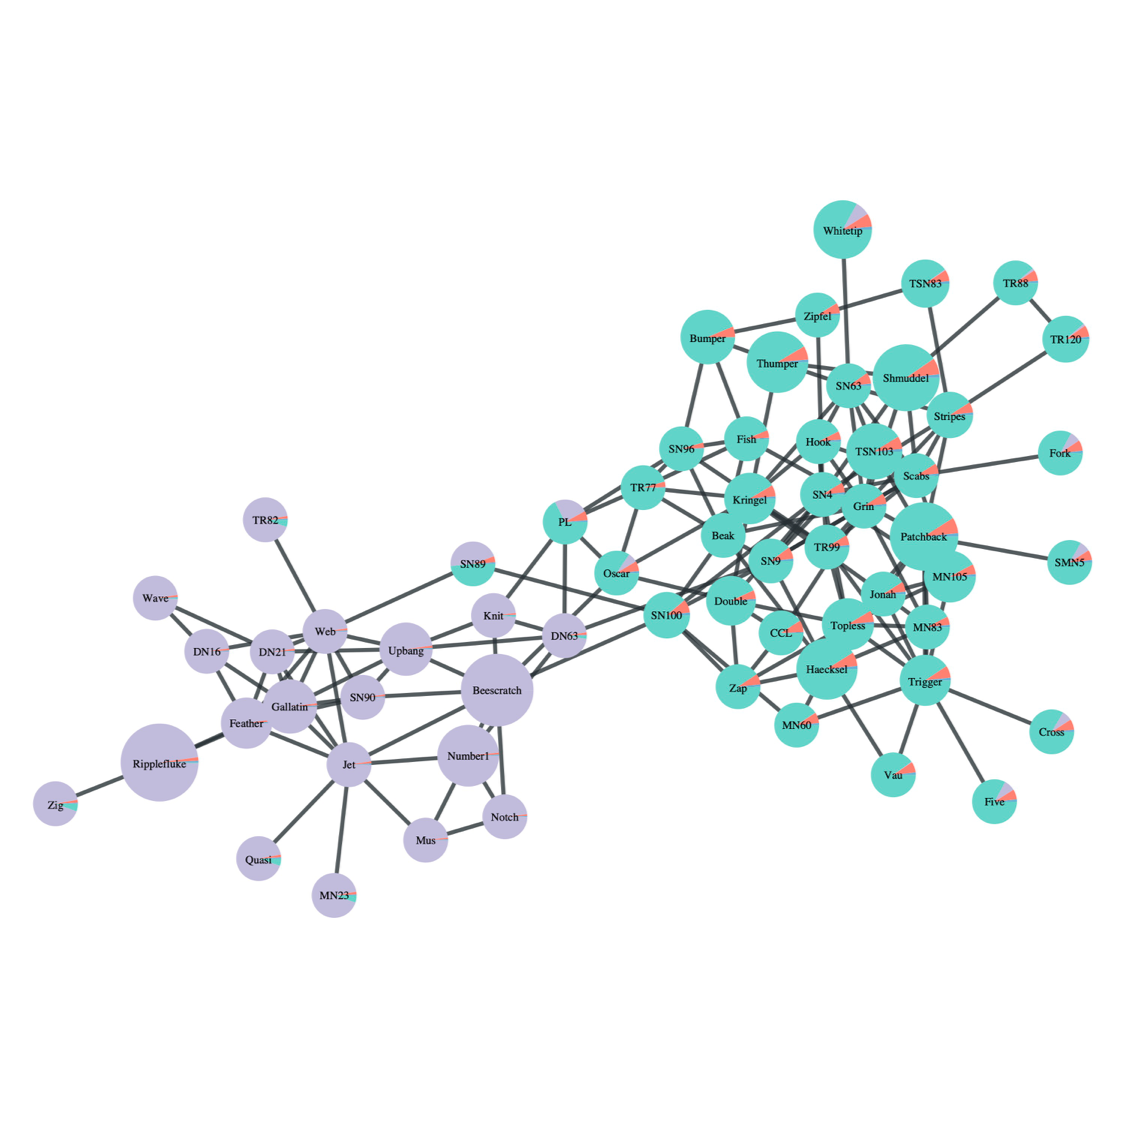

### Now we have a visualization of the community distrubution simulated by MCMC algorithm, nodes are colored as a pie, each fraction corresponding to the possibility of belong to a certain community. Labels on the nodes are names of the dolphins, it can be seen that our SBM model can make attributions to cluster the dolphins habitant in Doubtful Sound while more researches are required if one want to make sure the factors  that  affecting such dolphins' association strategies.

### Thus, we tried different methods to extract communities and have explained the possible reason 1. Then, we introduce the neo SBM here to quantify the correlation of underlying network community structure and the node matadata (sex) to explain the possible reason 2.

#### Secondly, we turned to the associating pattern of dolphins. Apply the neosbm to identify the relationship between gender characteristic and the community structure for dolphins’ network and create a graphical diagnostic. 

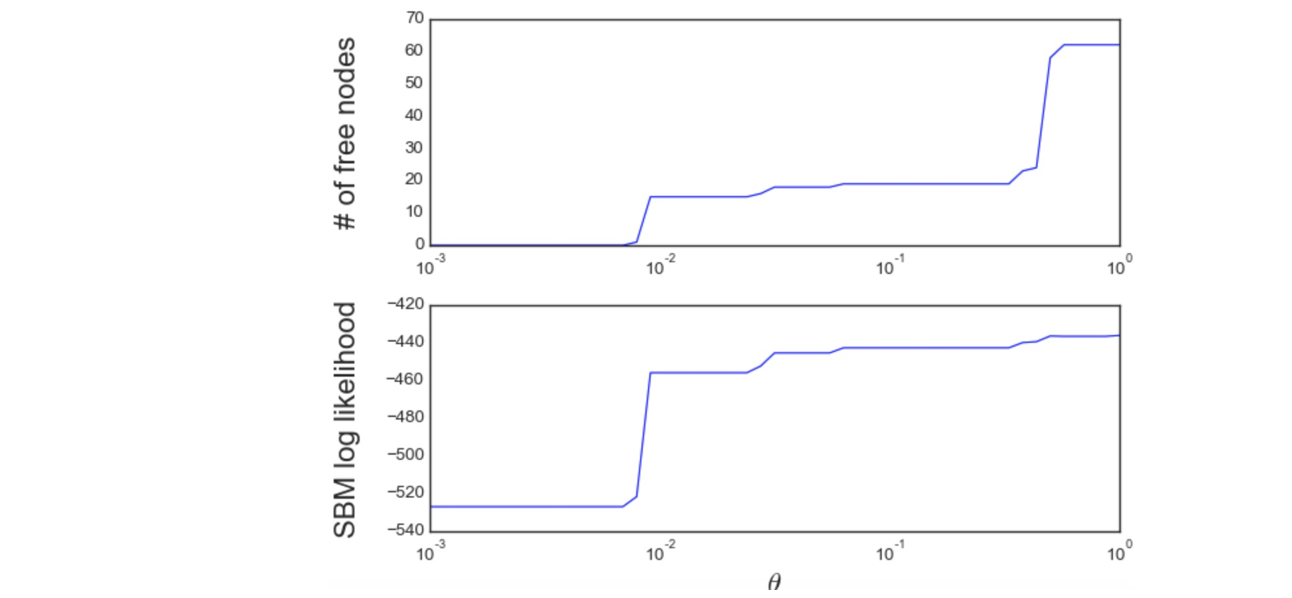
#### When q equals to zero at the initial point , the corresponding partition is the metadata partition. Then the neoSBM log likelihood jumps around the point θ=10^(-2) followed by a steady ramp, meaning that the neoSBM traverses the other optimal partition and then keep refining the model until the globally optimal partition is reached. 
#### The graphical diagnostic illustrates that our metadata partition (gender partition) describes different aspect with the network structure, and moreover, verifies that gender characteristic alone does not play a dominating role for dolphins forming small communities.

#### In fact, according to David Lusseau et al 's reasurch, this Doubtful Sound community has a unique social structure which is dissimilar to that seen in other bottlenose dolphin populations. Put it differently, this small society lives in large mixed-sex communities which we also verified by different methods in this paper. Morever, this network was temporally stable and the level of associations within this network was high, presenting transitivity in association only previously observed in male networks before for the species(Connor et al. 2000).

In [125]:
#information of sex of dolphins
vsex = g.vertex_properties["sex"]
vsex =['male','unknown','unknown','unknown','unknown','female','male','male','female',
       'male','female','female','unknown','male','female','male','female','male','male','male',
       'female','male','unknown','unknown','male','unknown','male','unknown','male',
       'male','male','male','male','female','female','unknown','unknown','female','female',
       'female','unknown','male','male','female','unknown','male','unknown','unknown','unknown',
       'female','unknown','female','unknown',
       'unknown','male','unknown','female','male','female','unknown','unknown','unknown']

In [ ]:
a=['Beak'male, 'Beescratch'unknown, 'Bumper'unknown, 'CCL'unknown, 'Cross'unknown, 'DN16'female,
'DN21'male, 'DN63'male, 'Double'female, 'Feather'male, 'Fish'female, 'Five'female, 
'Fork'unknown, 'Gallatin'male, 'Grin'female, 'Haecksel'male, 'Hook'female, 'Jet'male, 
'Jonah'male, 'Knit'male, 'Kringel'female, 'MN105'male, 'MN23'unknown, 'MN60'unknown, 'MN83'male,
'Mus'unknown, 'Notch'male, 'Number1'unknown, 'Oscar'male, 'Patchback'male, 'PL'male, 
'Quasi'male, 'Ripplefluke'male, 'Scabs'female, 'Shmuddel'female, 'SMN5'unknown,
'SN100'unknown, 'SN4'female, 'SN63'female, 'SN89'female, 'SN9'unknown, 'SN90'male, 'SN96'male, 
'Stripes'female, 'Thumper'unknown, 'Topless'male, 'TR120'unknown, 'TR77'unknown, 'TR82'unknown, 
'TR88'female, 'TR99'unknown, 'Trigger'female, 'TSN103'unknown, 'TSN83'unknown, 'Upbang'male, 
'Vau'unknown, 'Wave'female, 'Web'male, 'Whitetip'female, 'Zap'unknown, 'Zig'unknown, 'Zipfel'unknown]


In [171]:
vprop = g.new_vertex_property("string")
g.vp.sex=vprop

v=list()
for i in range(len(vsex)):
    v[i]=g.vertex(i)
    g.vp.sex[v[i]]="male"
print(g.vp.sex)

male
unknown
unknown
unknown
unknown
female
male
male
female
male
female
female
unknown
male
female
male
female
male
male
male
female
male
unknown
unknown
male
unknown
male
unknown
male
male
male
male
male
female
female
unknown
unknown
female
female
female
unknown
male
male
female
unknown
male
unknown
unknown
unknown
female
unknown
female
unknown
unknown
male
unknown
female
male
female
unknown
unknown
unknown
